In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from scipy.ndimage import gaussian_filter
import random
import torch, torchvision

In [3]:
array_list = []
total_tiles = 4
for i in range(1, total_tiles + 1):
    tiff_file = f"./tiles/extracted_image_{i}.tif"
    array_list.append(rasterio.open(tiff_file).read().transpose(1, 2, 0))

In [4]:
count = []
bin_edges = []

for i in range(4):
    c, be = np.histogram(array_list[i].flatten(), bins=2**12, range=(0, 2**12))
    count.append(c)
    bin_edges.append(be)
    del c, be

[(0, 1240), (0, 1300), (0, 1300), (200, 2200)]


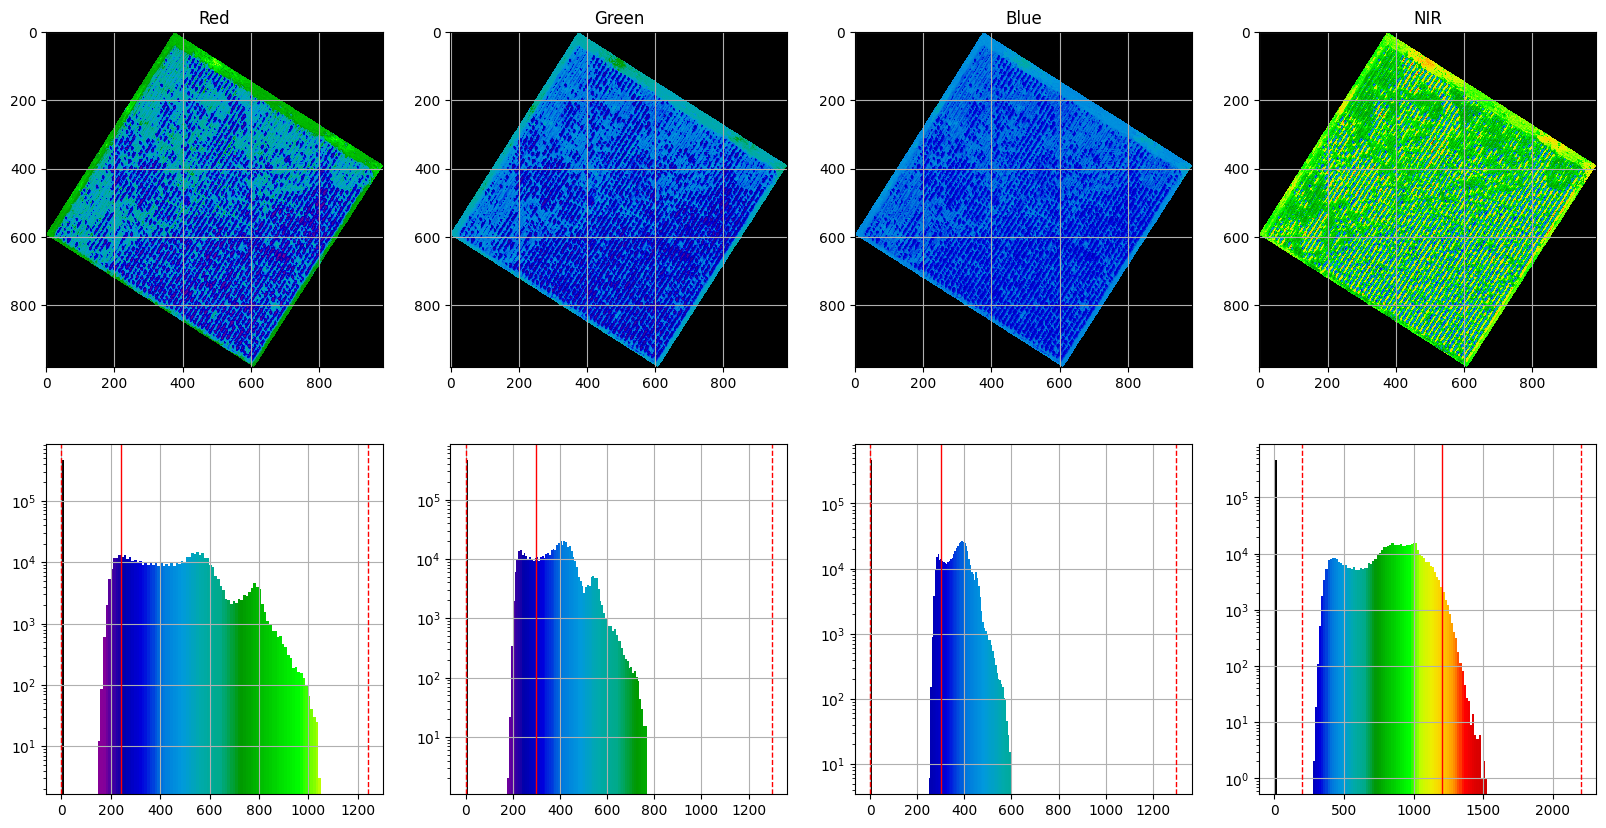

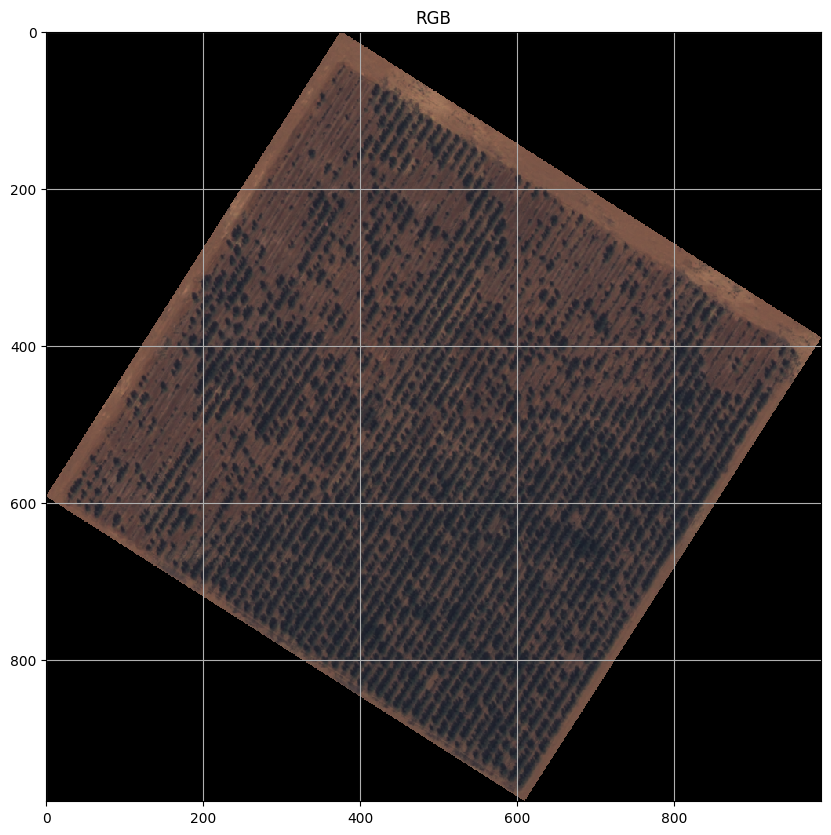

In [11]:
tile_index = 3
cmap = plt.cm.nipy_spectral

def maxmin_norm(array):
    # if array.ndim <= 2:
    #     return array / np.max(array)
    # else:
    #     return array / np.max(array, axis=(0, 1))
    return array/1600

gamma = 1.15
tile = array_list[tile_index]
mask = np.empty_like(tile, dtype=bool)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
title_list = ["Red", "Green", "Blue", "NIR", "RGB"]
cut = (0, 10000)
clip_center = [240, 300, 300, 1200]
clip_range = [80, 50, 25, 300]
clip_range = [1000, 1000, 1000, 1000]
clip_list = [(max(c-r, 0), min(c+r, 2**12-1)) for c, r in zip(clip_center, clip_range)]
print(clip_list)
for i in range(4):
    mask[:, :, i] = np.where((tile[:,:,i] > clip_list[i][0]) & (tile[:,:,i] <= clip_list[i][1]), True, False)
    axs[0, i].set_title(title_list[i])
    axs[0, i].imshow(maxmin_norm(tile[cut[0]:cut[1], cut[0]:cut[1], i])*mask[cut[0]:cut[1], cut[0]:cut[1], i], cmap='nipy_spectral', vmin=0, vmax=1)
    axs[0, i].grid(True)
    _, bin_edges, bars = axs[1, i].hist(tile[:,:,i].flatten(), bins=100)
    for bar, left_edge in zip(bars, bin_edges[:-1]):
        color = cmap(left_edge/1600)  # Get the color for the left edge of each bin
        bar.set_facecolor(color)
    axs[1, i].axvline(clip_center[i], color='r', linestyle='solid', linewidth=1)
    axs[1, i].axvline(clip_list[i][0], color='r', linestyle='dashed', linewidth=1)
    axs[1, i].axvline(clip_list[i][1], color='r', linestyle='dashed', linewidth=1)
    axs[1, i].grid(True)
    axs[1, i].set_yscale('log')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title(title_list[4])
ax.imshow(maxmin_norm(tile[:,:,:3])*np.repeat(np.expand_dims(np.prod(mask, axis=-1).astype(bool), axis=-1), 3, axis=-1))
ax.grid(True)

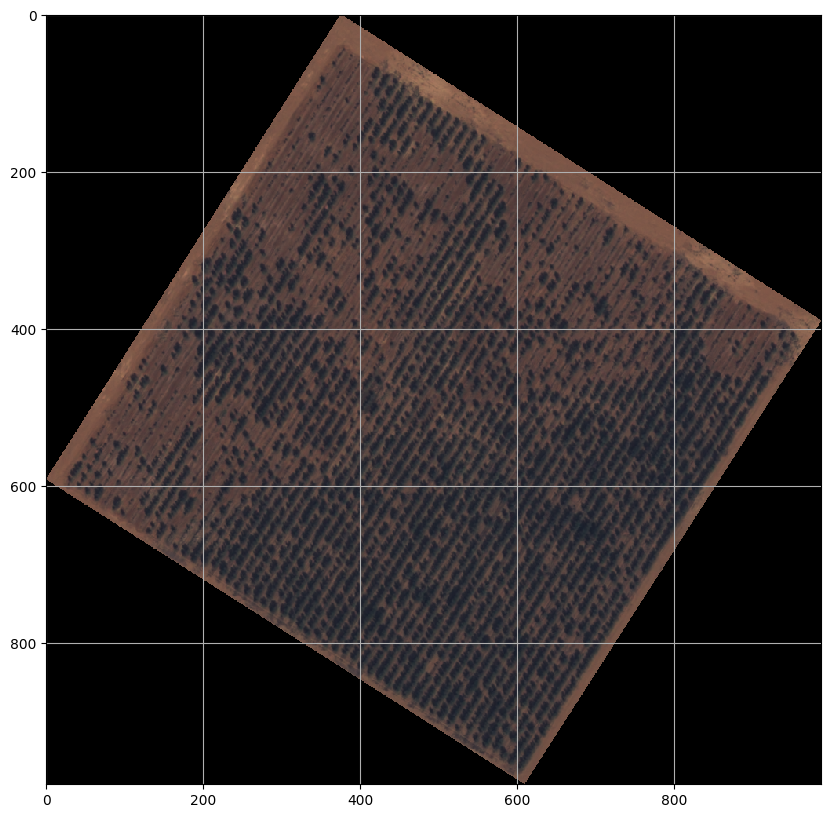

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(maxmin_norm(tile[cut[0]:cut[1], cut[0]:cut[1],:3]))
ax.grid(True)